In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train , y_train) , (x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

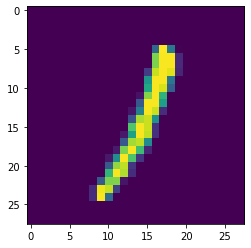

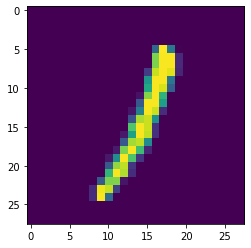

In [5]:
plt.imshow(x_train[99])
plt.show()
plt.imshow(x_train[99])

In [6]:
print(x_train[99])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 255
  103   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253
  253  30   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253
  253  30   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  4

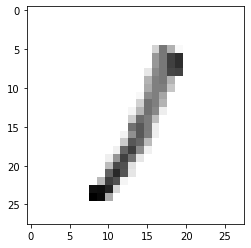

In [7]:
x_train = tf.keras.utils.normalize (x_train ,axis = 1)
x_test = tf.keras.utils.normalize (x_test ,axis = 1)
plt.imshow(x_train[99],cmap = plt.cm.binary)

In [8]:
print(x_train[99])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)#increasing 1 because we need to perform that 1 for kernel
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation ,Flatten , Conv2D, MaxPooling2D 

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully conected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
#fully conected layer 2

model.add(Dense(32))
model.add(Activation("relu"))
#fully conected layer 3

model.add(Dense(11))
model.add(Activation("softmax"))

In [13]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(x_trainr , y_train , epochs = 10, batch_size = 10, validation_split=0.3)


Epoch 1/10
4200/4200 [==============================] - 53s 13ms/step - loss: 0.2476 - accuracy: 0.9217 - val_loss: 0.0950 - val_accuracy: 0.9718
Epoch 2/10
4200/4200 [==============================] - 52s 12ms/step - loss: 0.0877 - accuracy: 0.9736 - val_loss: 0.0864 - val_accuracy: 0.9752
Epoch 3/10
4200/4200 [==============================] - 52s 12ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0965 - val_accuracy: 0.9698
Epoch 4/10
4200/4200 [==============================] - 54s 13ms/step - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 5/10
4200/4200 [==============================] - 47s 11ms/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0617 - val_accuracy: 0.9831
Epoch 6/10
4200/4200 [==============================] - 34s 8ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0569 - val_accuracy: 0.9843
Epoch 7/10
4200/4200 [==============================] - 33s 8ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0578 - v

In [15]:
test_loss , test_acc = model.evaluate(x_testr , y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0783 - accuracy: 0.9823
0.07825538516044617
0.9822999835014343


In [16]:
predictions = model.predict([x_testr])

In [17]:
print(predictions)

[[6.43026702e-13 1.05605684e-08 2.17242508e-08 ... 1.81884938e-10
  1.83554221e-07 3.10843367e-26]
 [1.12785195e-08 2.81910029e-09 9.99997735e-01 ... 2.31033075e-11
  8.86145463e-11 1.06396644e-26]
 [1.86982548e-11 1.00000000e+00 1.48127673e-11 ... 2.09360418e-09
  3.44130252e-10 2.86550647e-24]
 ...
 [2.81461628e-14 3.96428668e-08 5.58603034e-12 ... 1.15777488e-09
  7.92713649e-07 3.18568214e-25]
 [8.03099454e-09 1.78879210e-12 3.22723770e-12 ... 3.86758501e-08
  1.04350280e-08 2.49883777e-28]
 [8.18072809e-09 3.30597874e-14 4.77424657e-15 ... 1.24664723e-10
  1.08802385e-13 4.63489139e-27]]


In [18]:
np.argmax(predictions[0])

7

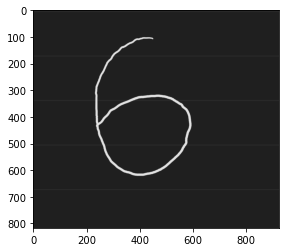

In [19]:
img= cv2.imread(r"C:\Users\Saiki\.ipynb_checkpoints\New folder\Six.png")
plt.imshow(img)

In [20]:
import cv2

In [21]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [22]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [23]:
newimg = tf.keras.utils.normalize(resized,axis = 1)

In [24]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [25]:
newimg.shape

(1, 28, 28, 1)

In [26]:
p = model.predict(newimg)

In [27]:
print(np.argmax(p))

6


In [29]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_COMPLEX
cap = cv2.VideoCapture(r"C:\jUsers\Saiki\.ipynb_checkpoints\New folder\h.mp4")
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("can't access webcam")

text = "some text in the box"
(text_width , text_height ) = cv2.getTextSize(text , font , fontScale = font_scale, thickness = 1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_chords = ((text_offset_x , text_offset_y),(text_offset_x + text_width + 2 , text_offset_y - text_height -2))
cntr = 0; 
while True:
  ret, frame = cap.read()
  cntr = cntr + 1;
  if ((cntr%2)==0):
    gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray , (28,28),interpolation = cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize(resized , axis = 1)
    newimg = np.array(newimg).reshape(-1 , IMG_SIZE, IMG_SIZE,1)
    predictions = model.predict(newimg)
    status = np.argmax(predictions)
    print(status)
    print(type(status))
    x1,y1,w1,h1 = 0,0,175,75
    cv2.rectangle(frame,(x1,x1), (x1 + w1, y1 +h1) , (0,0,0), -1)
    cv2.putText(frame, status.astype(str), (x1 + int(w1/5),y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX,0.7 ,(0,0,255),2)
    cv2.imshow(r"C:\Users\Sa#iki\.ipynb_checkpoints\New folder\h.mp4",frame)
    if cv2.waitKey(2) & 0xFF == ord("q"):
      break
cap.release()
cv2.destroyAllwindow()

6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.

6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.

6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
3
<class 'numpy.int64'>
0
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
8
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
0
<class 'numpy.int64'>
6
<class 'numpy.int64'>
8
<class 'numpy.int64'>
6
<class 'numpy.int64'>
8
<class 'numpy.int64'>
6
<class 'numpy.

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
